In [1]:
import sys
import cmath
import math
import os

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *

from libra_py import models_LVC, units, fgr_py


import matplotlib.pyplot as plt   # plots
%matplotlib inline 

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::complex<double>, std::allocator<std::complex<double> > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  if __name__ == '__main__':
/home/alexey/miniconda2/envs/libra/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<in

In [2]:
params = models_LVC.get_LVC_set1b()  # parameters are the same as in Xiang Sun code
 
ndof = len(params["omega"])
omega = Py2Cpp_double(params["omega"])
coeff = Py2Cpp_double(params["coup"])
d1 = Py2Cpp_double(params["d1"])
d2 = Py2Cpp_double(params["d2"])

U = MATRIX(ndof, ndof)
omega_nm = normal_modes(omega, coeff, U)

dE = params["omega_DA"]

req_nm = LVC2GOA_req(omega_nm, d1, d2)
gamma_nm = Py2Cpp_double(params["coup"])

s = -1.0     # non-equilibrium parameter

shift_NE = doubleList()
sz = len(req_nm)
for i in xrange(sz):
    shift_NE.append(s * req_nm[i])

gamma = 1.0   # DA_coupling
V = gamma

In [9]:
sim_params = {"dtau":0.02*units.fs2au, "Temperature":300.0, "do_output":False, "dyn_type":0, "method":0        }

t = 10.0 * units.fs2au
x = fgr_py.run_NEFRG_acf(t, dE, V, omega_nm, gamma_nm, req_nm, shift_NE, sim_params)

tau = x[0]
argg_re, argg_im = x[1], x[2]
lin_re, lin_im = x[3], x[4]
C_re, C_im = x[5], x[6]
int_re, int_im = x[7], x[8]

Use the default value =  FGR.txt


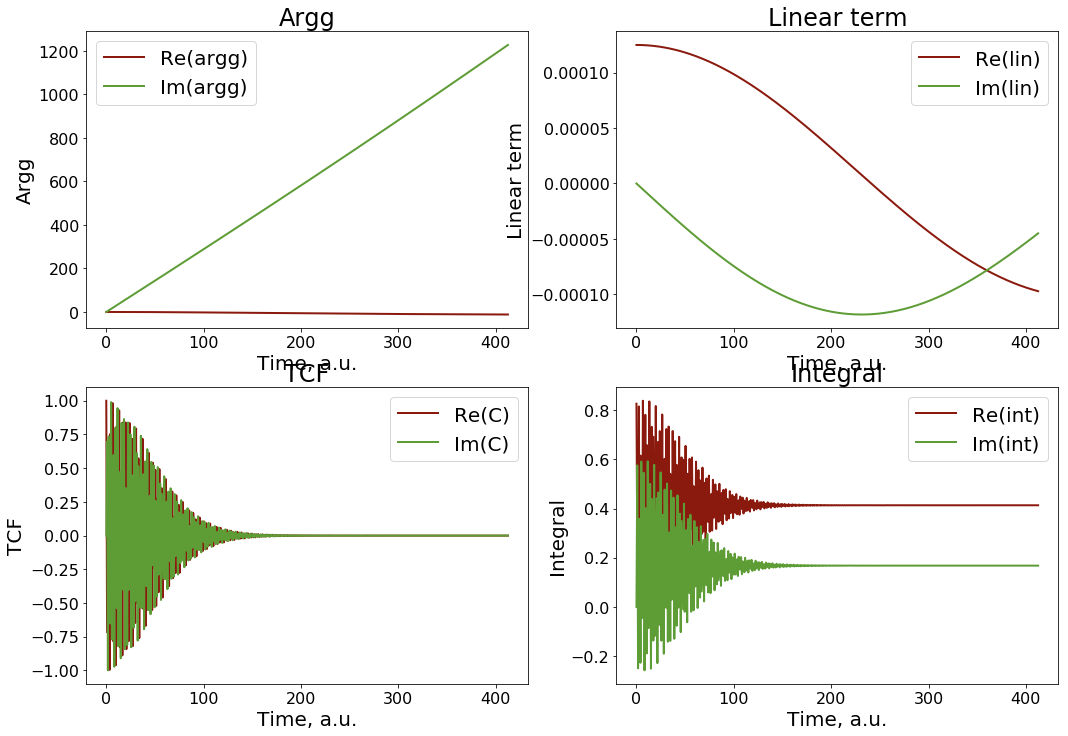

In [10]:
plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(2,2,1)
plt.title('Argg')
plt.xlabel('Time, a.u.')
plt.ylabel('Argg')
plt.plot(tau, argg_re, label='Re(argg)', linewidth=2, color = colors["11"]) 
plt.plot(tau, argg_im, label='Im(argg)', linewidth=2, color = colors["21"]) 
plt.legend()


plt.subplot(2,2,2)
plt.title('Linear term')
plt.xlabel('Time, a.u.')
plt.ylabel('Linear term')
plt.plot(tau, lin_re, label='Re(lin)', linewidth=2, color = colors["11"]) 
plt.plot(tau, lin_im, label='Im(lin)', linewidth=2, color = colors["21"]) 
plt.legend()


plt.subplot(2,2,3)
plt.title('TCF')
plt.xlabel('Time, a.u.')
plt.ylabel('TCF')
plt.plot(tau, C_re, label='Re(C)', linewidth=2, color = colors["11"]) 
plt.plot(tau, C_im, label='Im(C)', linewidth=2, color = colors["21"]) 
plt.legend()


plt.subplot(2,2,4)
plt.title('Integral')
plt.xlabel('Time, a.u.')
plt.ylabel('Integral')
plt.plot(tau, int_re, label='Re(int)', linewidth=2, color = colors["11"]) 
plt.plot(tau, int_im, label='Im(int)', linewidth=2, color = colors["21"]) 
plt.legend()

plt.show()
plt.close()